In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the dataset

In [2]:
pd_data = pd.read_csv('parkinsons.csv')
pd_data.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [3]:
pd_data.shape

(195, 24)

In [4]:
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
pd_data.groupby('status').count()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1,147,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147


In [5]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [6]:
pd_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
# check whether the column has any value other than numeric values
pd_data.iloc[:,1:][~pd_data.iloc[:,1:].applymap(np.isreal).all(1)]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [8]:
pd_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [9]:
pd_data.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


## Univariate & Bivariate Analysis

### Average vocal fundamental frequency MDVP:Fo(Hz)

In [10]:
print("The average vocal fundamental frequency of a person is {:.2f} and 99% of the people have a Fo of {:.2f}".format(pd_data['MDVP:Fo(Hz)'].mean(),pd_data['MDVP:Fo(Hz)'].quantile(0.90)))
      

The average vocal fundamental frequency of a person is 154.23 and 99% of the people have a Fo of 209.89


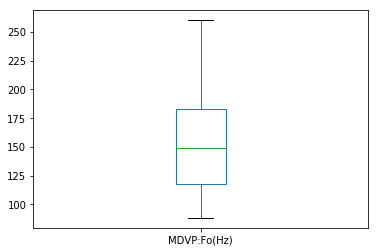

In [11]:
pd_data['MDVP:Fo(Hz)'].plot(kind='box')

In [12]:
pd_data['MDVP:Fo(Hz)'].skew()

0.5917374636540785

<p>The value is positive hence the data is skewed towards right side </p>

In [13]:
pd_data['MDVP:Fo(Hz)'].kurtosis()

-0.6278981066788805

<p>The value is negative hence the less data points are around the tail</p>

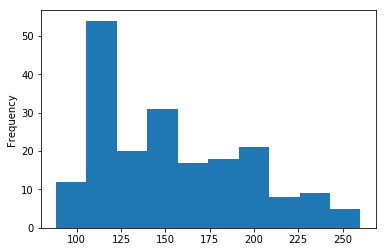

In [14]:
pd_data['MDVP:Fo(Hz)'].plot.hist()

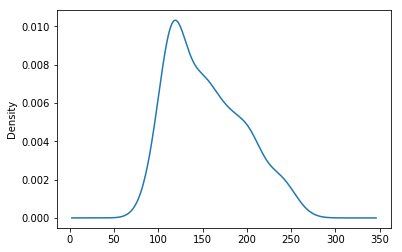

In [15]:
pd_data['MDVP:Fo(Hz)'].plot.kde()

### Maximum vocal fundamental frequency MDVP:Fhi (Hz)

In [16]:
print("The maximum vocal fundamental frequency of a person is {:.2f} and 99% of the people have a Fhi of {:.2f}".format(pd_data['MDVP:Fhi(Hz)'].mean(),pd_data['MDVP:Fhi(Hz)'].quantile(0.90)))
      

The maximum vocal fundamental frequency of a person is 197.10 and 99% of the people have a Fhi of 261.00


In [17]:
pd_data['MDVP:Fhi(Hz)'].skew()

2.542145997588399

<p>The value is positive hence the data is skewed towards right side </p>

In [18]:
pd_data['MDVP:Fhi(Hz)'].kurtosis()

7.627241211631892

<p>The value is postive hence the more data points are around the tail</p>

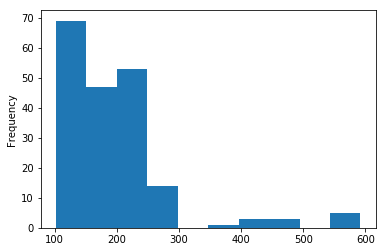

In [19]:
pd_data['MDVP:Fhi(Hz)'].plot.hist(bins=10)

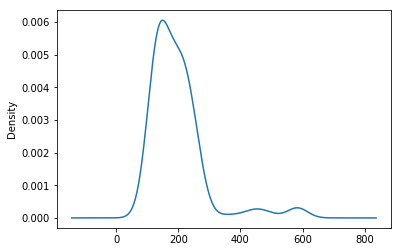

In [20]:
pd_data['MDVP:Fhi(Hz)'].plot.kde()

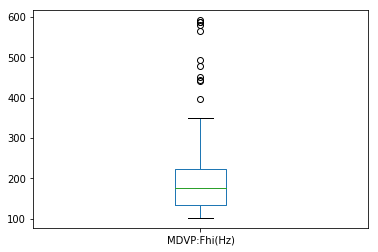

In [21]:
pd_data['MDVP:Fhi(Hz)'].plot(kind='box')

#### Outlier Treatment

In [22]:
q3 = pd_data['MDVP:Fhi(Hz)'].quantile(0.75)
q1 = pd_data['MDVP:Fhi(Hz)'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 313.5485
outliers_below : 45.51950000000002


In [23]:
pd_data['MDVP:Fhi(Hz)'].loc[pd_data['MDVP:Fhi(Hz)']>outliers_above].count()

12

In [24]:
pd_data['MDVP:Fhi(Hz)'].loc[pd_data['MDVP:Fhi(Hz)']<outliers_below].count()

0

In [25]:
pd_data['MDVP:Fhi(Hz)'].loc[pd_data['MDVP:Fhi(Hz)']>outliers_above]

16     349.259
73     588.518
102    586.567
115    492.892
116    442.557
117    450.247
118    442.824
120    479.697
149    565.740
186    592.030
187    581.289
193    396.961
Name: MDVP:Fhi(Hz), dtype: float64

In [26]:
mean_val = pd_data['MDVP:Fhi(Hz)'].loc[pd_data['MDVP:Fhi(Hz)']<=outliers_above].mean()

In [27]:
pd_data['MDVP:Fhi(Hz)'] = pd_data['MDVP:Fhi(Hz)'].mask(pd_data['MDVP:Fhi(Hz)']>outliers_above,mean_val)

In [28]:
pd_data['MDVP:Fhi(Hz)'].head(20)

0     157.302000
1     148.650000
2     131.111000
3     137.871000
4     141.781000
5     131.162000
6     137.244000
7     113.840000
8     132.068000
9     120.103000
10    112.240000
11    115.871000
12    159.866000
13    179.139000
14    163.305000
15    217.455000
16    177.414634
17    232.181000
18    175.829000
19    189.398000
Name: MDVP:Fhi(Hz), dtype: float64

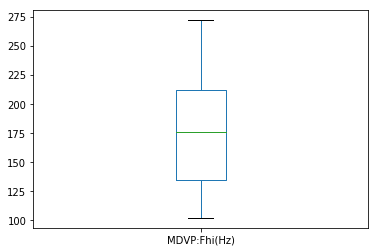

In [29]:
pd_data['MDVP:Fhi(Hz)'].plot(kind='box')

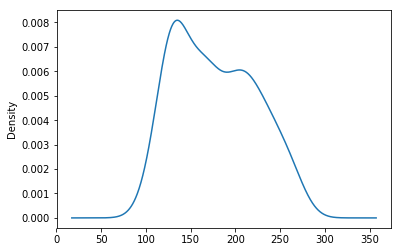

In [30]:
pd_data['MDVP:Fhi(Hz)'].plot.kde()

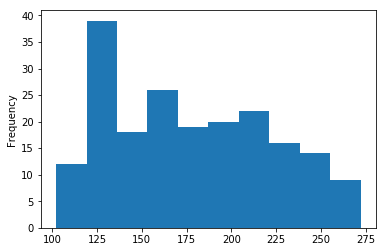

In [31]:
pd_data['MDVP:Fhi(Hz)'].plot.hist()

In [32]:
pd_data['MDVP:Fhi(Hz)'].skew()

0.2984561761401523

In [33]:
pd_data['MDVP:Fhi(Hz)'].kurtosis()

-1.0462818430124097

<p> After outlier treatment kurtosis indicates that less number of data points are around the tail </p>

### Minimum vocal fundamental frequency MDVP:Flo (Hz)

In [34]:
print("The minimum vocal fundamental frequency of a person is {:.2f} and 99% of the people have a Flo of {:.2f}".format(pd_data['MDVP:Flo(Hz)'].mean(),pd_data['MDVP:Flo(Hz)'].quantile(0.90)))

The minimum vocal fundamental frequency of a person is 116.32 and 99% of the people have a Flo of 187.88


In [35]:
pd_data['MDVP:Flo(Hz)'].skew()

1.2173504486278077

<p>The value is positive hence the data is skewed towards right side </p>

In [36]:
pd_data['MDVP:Flo(Hz)'].kurtosis()

0.6546145211395391

<p>The value is postive hence the more data points are around the tail</p>

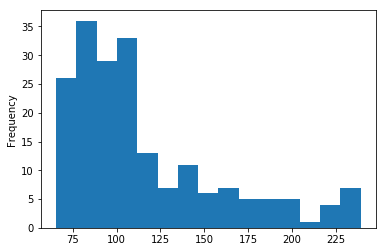

In [37]:
pd_data['MDVP:Flo(Hz)'].plot.hist(bins=15)

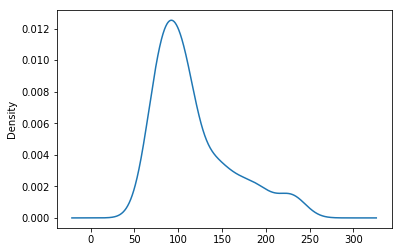

In [38]:
pd_data['MDVP:Flo(Hz)'].plot.kde()

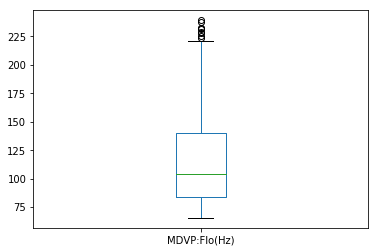

In [39]:
pd_data['MDVP:Flo(Hz)'].plot(kind='box')

#### Outlier Treatment

In [40]:
q3 = pd_data['MDVP:Flo(Hz)'].quantile(0.75)
q1 = pd_data['MDVP:Flo(Hz)'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 195.74600000000004
outliers_below : 28.563499999999976


In [41]:
pd_data['MDVP:Flo(Hz)'].loc[pd_data['MDVP:Flo(Hz)']>outliers_above].count()

15

In [42]:
pd_data['MDVP:Flo(Hz)'].loc[pd_data['MDVP:Flo(Hz)']<outliers_below].count()

0

In [43]:
pd_data['MDVP:Flo(Hz)'].loc[pd_data['MDVP:Flo(Hz)']>outliers_above]

33     197.079
34     196.160
42     225.227
43     232.483
44     232.435
45     227.911
46     231.848
62     205.495
63     223.634
64     221.156
111    199.020
166    229.256
167    237.303
169    219.783
170    239.170
Name: MDVP:Flo(Hz), dtype: float64

In [44]:
max_val = pd_data['MDVP:Flo(Hz)'].loc[pd_data['MDVP:Flo(Hz)']<=outliers_above].max()

In [45]:
pd_data['MDVP:Flo(Hz)'] = pd_data['MDVP:Flo(Hz)'].mask(pd_data['MDVP:Flo(Hz)']>outliers_above,max_val)

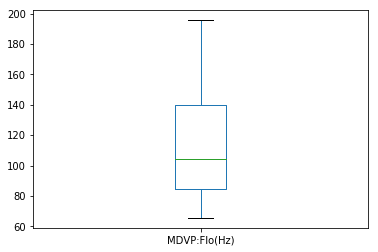

In [46]:
pd_data['MDVP:Flo(Hz)'].plot(kind='box')

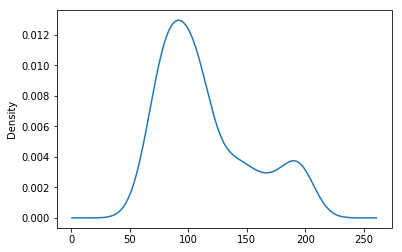

In [47]:
pd_data['MDVP:Flo(Hz)'].plot.kde()

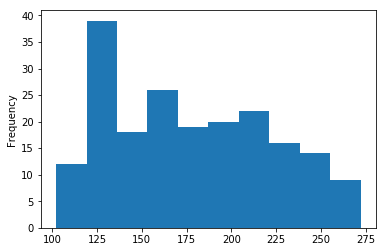

In [48]:
pd_data['MDVP:Fhi(Hz)'].plot.hist()

In [49]:
pd_data['MDVP:Flo(Hz)'].skew()

0.9105008789129809

In [50]:
pd_data['MDVP:Flo(Hz)'].kurtosis()

-0.33806216568138847

## Five measures of variation in fundamental frequency
### MDVP:Jitter(%)

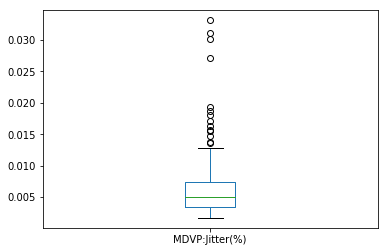

In [51]:
pd_data['MDVP:Jitter(%)'].plot(kind='box')

In [52]:
print("The minimum vocal fundamental frequency of a person is {:.2f} and 99% of the people have a Jitter of {:.2f}".format(pd_data['MDVP:Jitter(%)'].mean(),pd_data['MDVP:Jitter(%)'].quantile(0.90)))

The minimum vocal fundamental frequency of a person is 0.01 and 99% of the people have a Jitter of 0.01


In [53]:
pd_data['MDVP:Jitter(%)'].skew()

3.0849462014441817

In [54]:
pd_data['MDVP:Jitter(%)'].kurtosis()

12.030939276179508

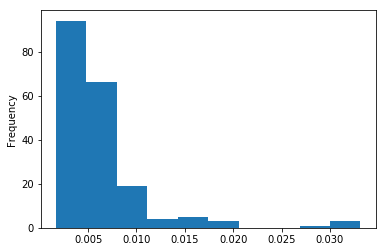

In [55]:
pd_data['MDVP:Jitter(%)'].plot.hist()

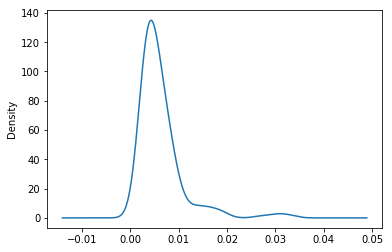

In [56]:
pd_data['MDVP:Jitter(%)'].plot.kde()

In [57]:
q3 = pd_data['MDVP:Jitter(%)'].quantile(0.75)
q1 = pd_data['MDVP:Jitter(%)'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 0.01127
outliers_below : -0.0004450000000000001


In [58]:
pd_data['MDVP:Jitter(%)'].loc[pd_data['MDVP:Jitter(%)']>outliers_above].count()

16

In [59]:
pd_data['MDVP:Jitter(%)'].loc[pd_data['MDVP:Jitter(%)']<outliers_below].count()

0

In [60]:
pd_data['MDVP:Jitter(%)'].loc[pd_data['MDVP:Jitter(%)']>outliers_above]

4      0.01284
97     0.01280
98     0.01378
99     0.01936
100    0.03316
101    0.01551
102    0.03011
146    0.01568
147    0.01466
148    0.01719
149    0.01627
150    0.01872
151    0.03107
152    0.02714
157    0.01813
192    0.01360
Name: MDVP:Jitter(%), dtype: float64

In [61]:
max_val = pd_data['MDVP:Jitter(%)'].loc[pd_data['MDVP:Jitter(%)']<=outliers_above].max()

In [62]:
pd_data['MDVP:Jitter(%)'] = pd_data['MDVP:Jitter(%)'].mask(pd_data['MDVP:Jitter(%)']>outliers_above,max_val)

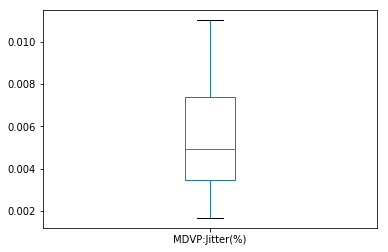

In [63]:
pd_data['MDVP:Jitter(%)'].plot(kind='box')

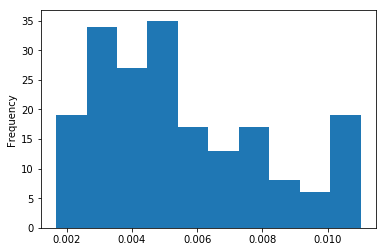

In [64]:
pd_data['MDVP:Jitter(%)'].plot.hist()

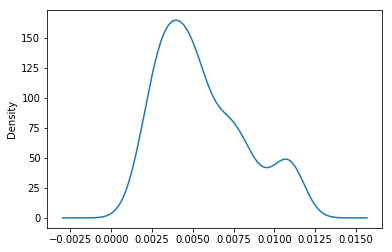

In [65]:
pd_data['MDVP:Jitter(%)'].plot.kde()

In [66]:
pd_data['MDVP:Jitter(%)'].skew()

0.7135316854634219

In [67]:
pd_data['MDVP:Jitter(%)'].kurtosis()

-0.45799448113050856

### MDVP:Jitter(Abs)

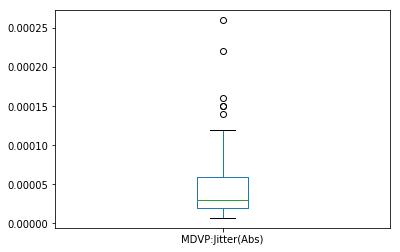

In [68]:
pd_data['MDVP:Jitter(Abs)'].plot(kind='box')

In [69]:
pd_data['MDVP:Jitter(Abs)'].skew()

2.6490714165257274

In [70]:
pd_data['MDVP:Jitter(Abs)'].kurtosis()

10.869042517763667

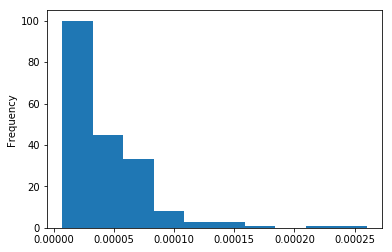

In [71]:
pd_data['MDVP:Jitter(Abs)'].plot.hist()

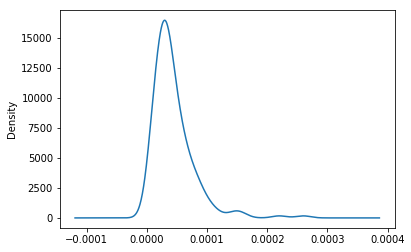

In [72]:
pd_data['MDVP:Jitter(Abs)'].plot.kde()

In [73]:
q3 = pd_data['MDVP:Jitter(Abs)'].quantile(0.75)
q1 = pd_data['MDVP:Jitter(Abs)'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 9.999999999999999e-05
outliers_below : -1.9999999999999995e-05


In [74]:
pd_data['MDVP:Jitter(Abs)'].loc[pd_data['MDVP:Jitter(Abs)']>outliers_above].count()

12

In [75]:
pd_data['MDVP:Jitter(Abs)'].loc[pd_data['MDVP:Jitter(Abs)']<outliers_below].count()

0

In [76]:
mean_val = pd_data['MDVP:Jitter(Abs)'].loc[pd_data['MDVP:Jitter(Abs)']<=outliers_above].mean()

In [77]:
pd_data['MDVP:Jitter(Abs)'] = pd_data['MDVP:Jitter(Abs)'].mask(pd_data['MDVP:Jitter(Abs)']>outliers_above,mean_val)

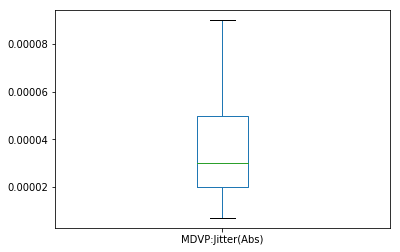

In [78]:
pd_data['MDVP:Jitter(Abs)'].plot(kind='box')

In [79]:
pd_data['MDVP:Jitter(Abs)'].skew()

0.7300925097869511

In [80]:
pd_data['MDVP:Jitter(Abs)'].kurtosis()

0.008361144000160525

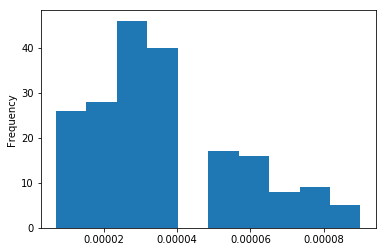

In [81]:
pd_data['MDVP:Jitter(Abs)'].plot.hist()

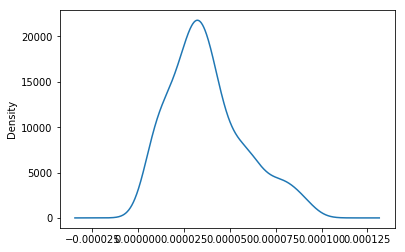

In [82]:
pd_data['MDVP:Jitter(Abs)'].plot.kde()

### MDVP:RAP

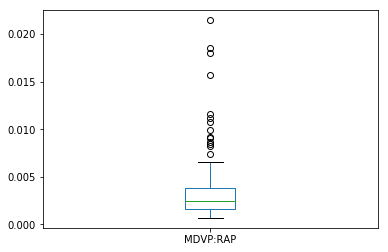

In [83]:
pd_data['MDVP:RAP'].plot(kind='box')

In [84]:
pd_data['MDVP:RAP'].skew()

3.3607084504805536

In [85]:
pd_data['MDVP:RAP'].kurtosis()

14.213797721522422

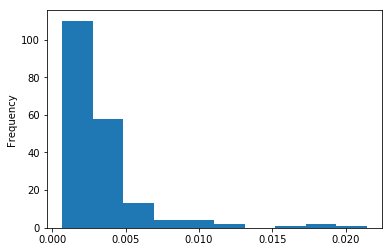

In [86]:
pd_data['MDVP:RAP'].plot.hist()

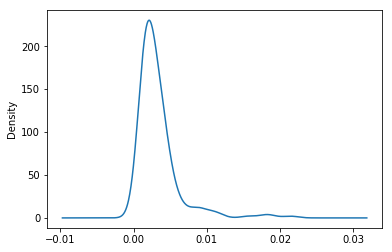

In [87]:
pd_data['MDVP:RAP'].plot.kde()

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


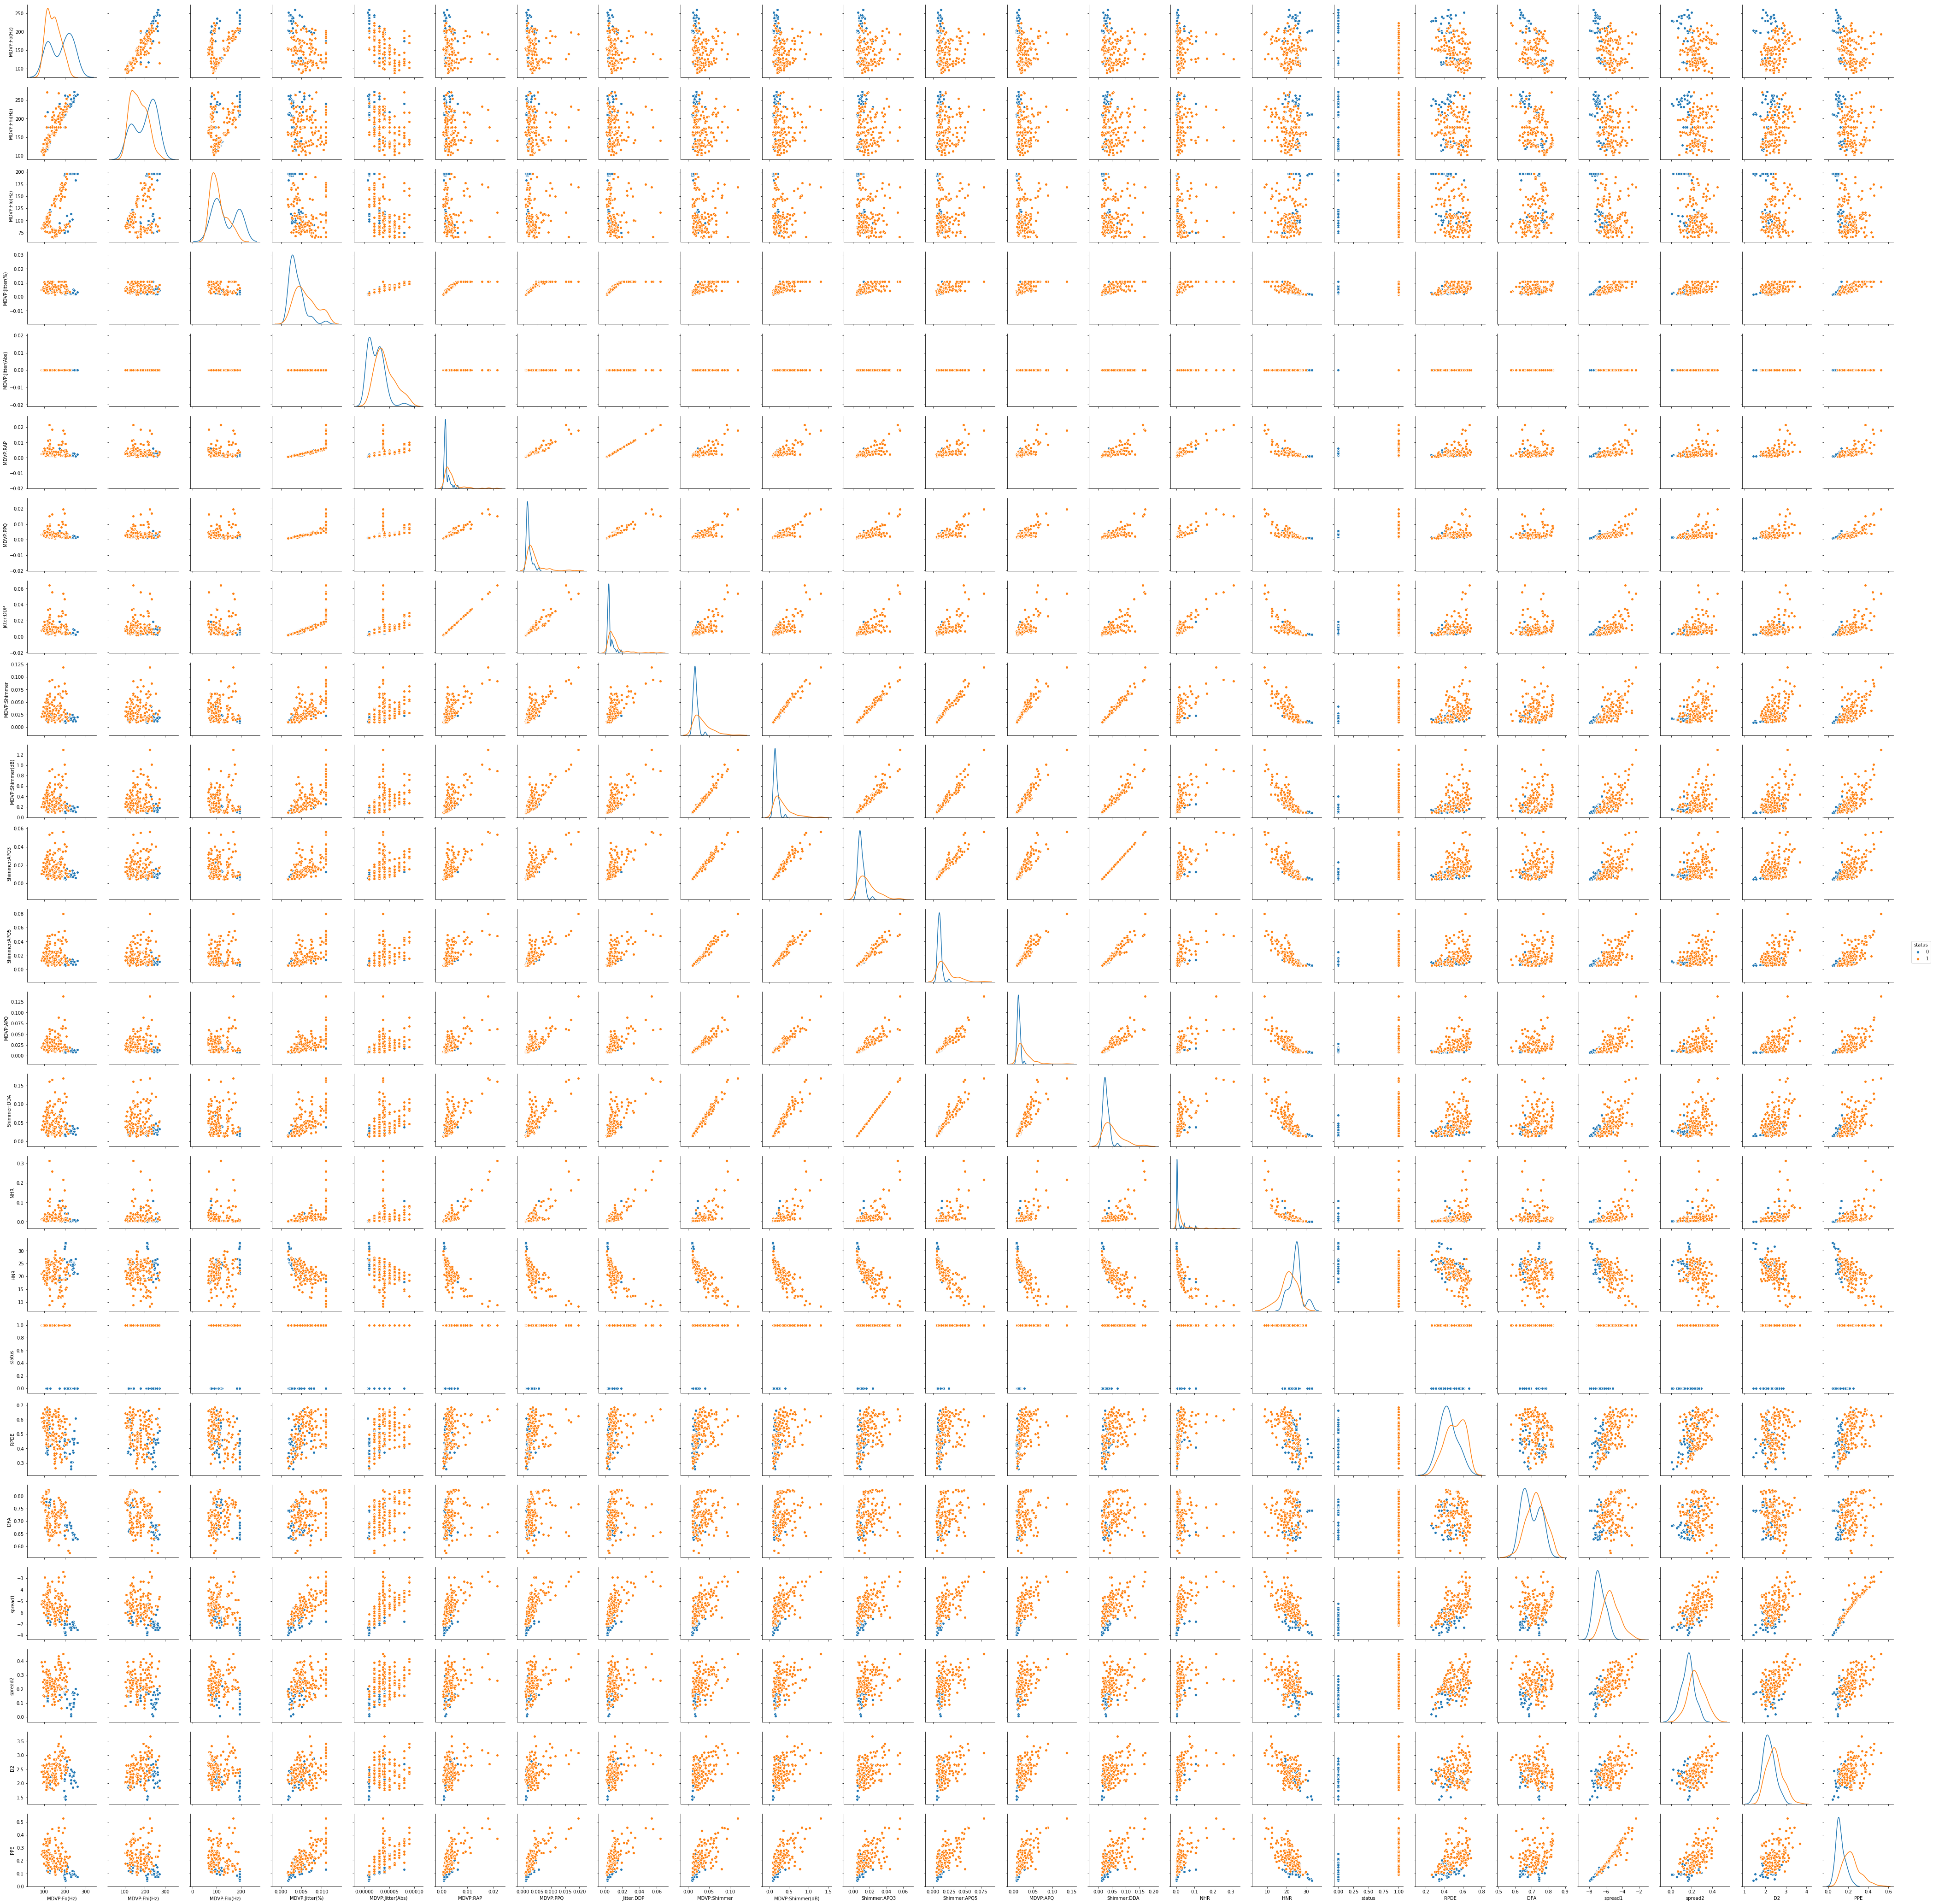

In [88]:
sns.pairplot(pd_data, hue = "status",diag_kind="kde")

In [89]:
pd_data.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.880982,0.561371,-0.250583,-0.547372,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.880982,1.000000,0.377400,-0.142345,-0.407343,-0.030363,-0.043300,-0.030345,-0.037342,-0.012917,...,-0.037383,0.024090,-0.041859,-0.312888,-0.231960,-0.439904,-0.283326,-0.159403,0.230478,-0.241527
MDVP:Flo(Hz),0.561371,0.377400,1.000000,-0.323256,-0.431424,-0.086361,-0.076008,-0.086322,-0.126839,-0.100045,...,-0.137664,-0.098493,0.214699,-0.338143,-0.402776,0.009791,-0.372640,-0.207804,-0.089108,-0.317729
MDVP:Jitter(%),-0.250583,-0.142345,-0.323256,1.000000,0.764780,0.803458,0.824433,0.803348,0.680992,0.697224,...,0.660841,0.635809,-0.725859,0.374562,0.425158,0.217313,0.758064,0.423388,0.412113,0.769584
MDVP:Jitter(Abs),-0.547372,-0.407343,-0.431424,0.764780,1.000000,0.410835,0.488413,0.410712,0.427913,0.430953,...,0.402661,0.225299,-0.456776,0.395158,0.420964,0.408744,0.660562,0.407151,0.179888,0.659667
MDVP:RAP,-0.076194,-0.030363,-0.086361,0.803458,0.410835,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,-0.043300,-0.076008,0.824433,0.488413,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,-0.030345,-0.086322,0.803348,0.410712,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,-0.037342,-0.126839,0.680992,0.427913,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,-0.012917,-0.100045,0.697224,0.430953,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


### Storing the Processed Data into a CSV file

In [90]:
pd_data.to_csv('cleaned-data.csv')